In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the Excel file
df = pd.read_excel("Skills.xlsx")

# Drop rows with "Nan" values in the 'Skill 1' column
df = df[~df['Skill 1'].astype(str).str.contains('nan', case=False, na=False)]

# Ensure all values in 'Skill 1' column are strings
df['Skill 1'] = df['Skill 1'].astype(str)

# Remove rows with empty 'Skill 1' after preprocessing
df = df[df['Skill 1'].str.strip() != '']

# Display the preprocessed dataframe
df.head()


,Skill 1
0,Code
2,Innovative
3,Detailed
5,Analytical
6,Patience


In [2]:
# Preprocess the text data
texts = df['Skill 1']

# Convert the text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)


In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(X)

# Get labels from DBSCAN
labels_dbscan = dbscan.labels_

# Calculate the silhouette score
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X, labels_dbscan)
    print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}')
else:
    print("DBSCAN Silhouette Score: All samples are clustered into a single cluster or noise.")

df['cluster_dbscan'] = labels_dbscan


DBSCAN Silhouette Score: 0.63


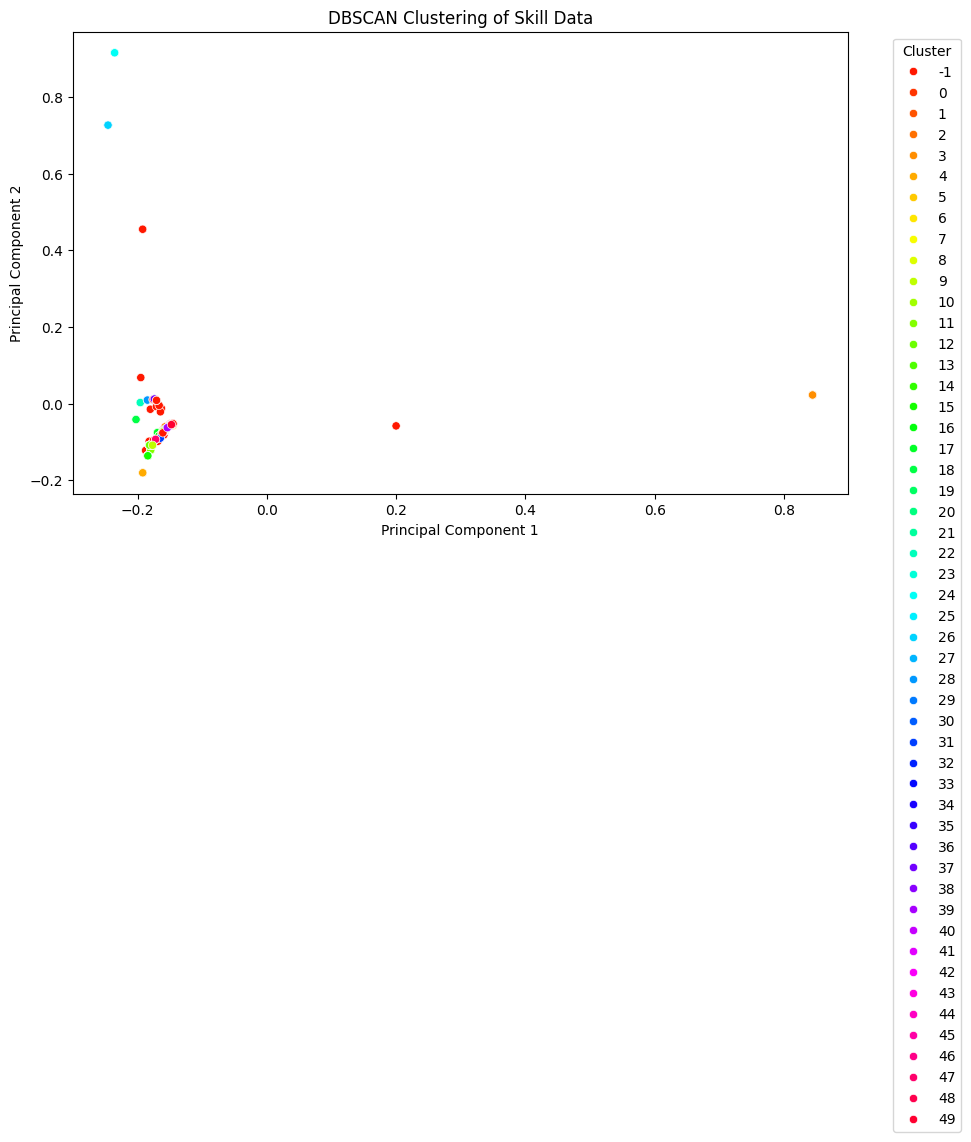

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to plot clusters
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(X.toarray())
    
    colors = sns.color_palette("hsv", len(set(labels)))
    x_axis = scatter_plot_points[:, 0]
    y_axis = scatter_plot_points[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_axis, y=y_axis, hue=labels, palette=colors)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot DBSCAN clusters
plot_clusters(X, labels_dbscan, 'DBSCAN Clustering of Skill Data')


In [5]:
# Display sample text from each cluster for DBSCAN
print("DBSCAN Clusters:")
for cluster in set(labels_dbscan):
    print(f"\nCluster {cluster}:")
    samples = df[df['cluster_dbscan'] == cluster]['Skill 1'].head(3).values
    for sample in samples:
        print(f" - {sample}")


DBSCAN Clusters:

Cluster 0:
 - Innovative 
 - Innovative


Cluster 1:
 - Detailed
 - Detailed 

Cluster 2:
 - Analytical 
 - Analytical 
 - Analytical

Cluster 3:
 - Patience
 - Patience
 - Patience

Cluster 4:
 - Creativity 
 - Creativity
 - Creativity 

Cluster 5:
 - Creative 
 - Creative 

Cluster 6:
 - Detail Oriented

 - Detail Oriented

Cluster 7:
 - Teamwork 
 - Teamwork

 - Teamwork

Cluster 8:
 - Understanding 
 - Understanding
 - Understanding 

Cluster 9:
 - Coding 
 - Coding
 - Coding 

Cluster 10:
 - Empathy
 - Empathy 
 - Empathy

Cluster 11:
 - Critical Thinking 
 - Critical Thinking 
 - Critical Thinking

Cluster 12:
 - Problem Solving 

 - Problem Solving
 - Problem Solving 

Cluster 13:
 - Compassion 

 - Compassion
 - Compassion 

Cluster 14:
 - Analytics 
 - Analytics

Cluster 15:
 - Precision
 - Precision
 - Precision 

Cluster 16:
 - Leadership
 - Leadership
 - Leadership 

Cluster 17:
 - Programming
 - Programming 
 - Programming

Cluster 18:
 - Problem-Solving 